In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv(r'C:\Users\rodri\TERA\Balanceamento de Datasets\Porto_Seguro\train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
df_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_train.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

Observa-se que existem muito mais não sinistros que sinistros...

Cerca de desbalanceamento em 3,78 % dos dados são de sinistros ! =O

Desbalanceamento Moderado

In [6]:
target_count = df_train.target.value_counts()

print('Class 0:',target_count[0])

print('Class 1:',target_count[1])


print('Proportion:',round(target_count[0]/target_count[1],2),':1')

Class 0: 573518
Class 1: 21694
Proportion: 26.44 :1


<AxesSubplot:title={'center':'Count (target)'}>

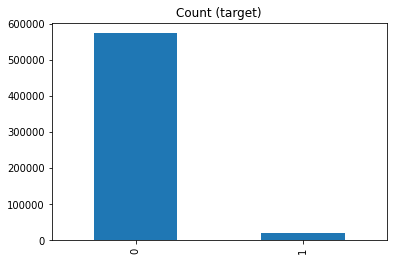

In [7]:
target_count.plot(kind='bar',title='Count (target)')

## Paradoxo da acurácia neste dataset

Lembra que falamos sobre isso no exemplo de detecção de fraudes? Agora vamos
mostrar como ele acontece na prática. Para isso, vamos usar um classificador e não
vamos realizar nenhuma transformação ou análise no dataset. Primeiro vamos avaliar
apenas a métrica accuracy_score .

## XGBoost


Esse algorítimo é extremamente complexo e
robusto. Em seu default ele vai realizar operações como regularização, estratégia para
lidar com dados faltantes já vem preparado para computação paralela e crossvalidation. Tudo isso para dizer que as métricas alcançadas por esse modelo são
extremamente performáticas mas que falaremos mais sobre ele em materiais e aulas
mais adiante

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (plot_confusion_matrix, 
                             accuracy_score, recall_score,precision_score, 
                             plot_roc_curve,f1_score)

In [9]:
# Retirar o id and target

labels = df_train.columns[2:]

In [10]:
X = df_train[labels]
y = df_train['target']

In [1]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)                                    

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit

In [12]:
model=XGBClassifier()

XGBoost=model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :',round(accuracy*100,2),'%') 

Accuracy : 96.3 %


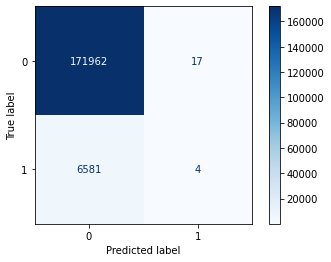

In [14]:
plot_confusion_matrix(XGBoost,X_test,y_test,cmap='Blues')

In [102]:
print('F1_Score: ',round(f1_score(y_test, y_pred)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred)*100,2),'%')

F1_Score:  0.12 %
Recall:  0.06 %
Precision: 19.05 %
Accuracy  96.3 %



## Sklearn Imblearn

Essa biblioteca reúne diversas técnicas das mais simples como Random Oversampler e
Random Undersampler a integrações com Keras e Tensorflow para redes neurais. Vale
a pena dar uma olhada na documentação

In [16]:
#vamos importar os algoritmos a serem explorados

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# counter takes values returns value_counts dictionary

## Random Undersampling e Oversampling

Observe que a implementação dessas duas técnicas por meio do imblearn do scikit
learn é virtualmente a mesma, mudando apenas o nome do algoritmo a ser
instanciado. Para fins didáticos, alterei o nome dos resamples dos datasets de acordo
com o nome de cada algoritmo.

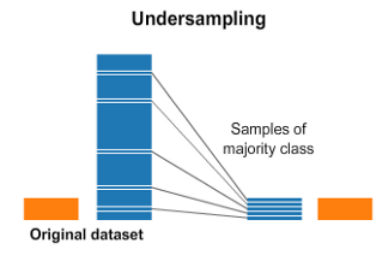

In [17]:
print("Tamanho atual",Counter(y))

Tamanho atual Counter({0: 573518, 1: 21694})


In [187]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:ylabel='target'>

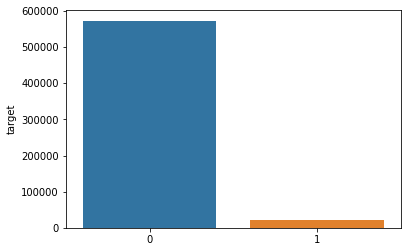

In [94]:
sns.barplot(x=['0','1'],y=y.value_counts()) # Originalmente

In [20]:
under = RandomUnderSampler(random_state=42)

X_under,y_under = under.fit_resample(X,y)

print('Resampled dataset shape', Counter(y_under))

Resampled dataset shape Counter({0: 21694, 1: 21694})


<AxesSubplot:ylabel='target'>

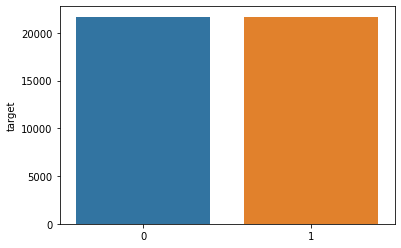

In [95]:
sns.barplot(x=['0','1'],y= y_under.value_counts())

In [22]:
model = XGBClassifier()

model_1= model.fit(X_under,y_under)

y_pred_1 = model_1.predict(X_test)

In [23]:
print('F1_Score: ',round(f1_score(y_test, y_pred_1)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_1)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_1)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_1)*100,2),'%')

F1_Score:  12.45 %
Recall:  74.9 %
Precision: 6.79 %
Accuracy  61.15 %


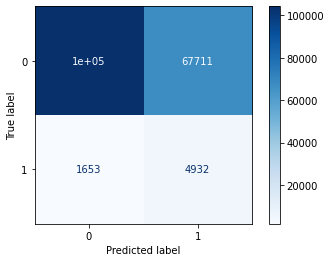

In [24]:
plot_confusion_matrix(model.fit(X_under,y_under),X_test,y_test,cmap='Blues')

In [25]:
print('F1_Score: ',round(f1_score(y_test, y_pred)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred)*100,2),'%')

F1_Score:  0.12 %
Recall:  0.06 %
Precision: 19.05 %
Accuracy  96.3 %


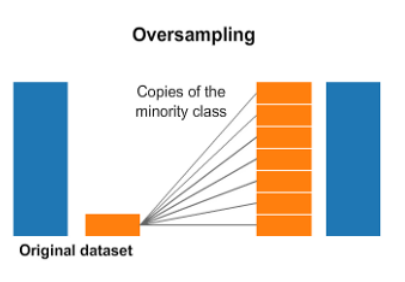

In [26]:
print("Tamanho atual",Counter(y))

Tamanho atual Counter({0: 573518, 1: 21694})


<AxesSubplot:ylabel='target'>

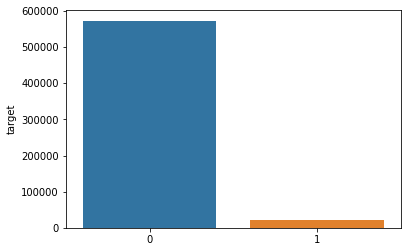

In [96]:
sns.barplot(x=['0','1'],y=y.value_counts()) # Originalmente

In [28]:
over = RandomOverSampler(random_state=42)

X_over,y_over = over.fit_resample(X,y)

print('Resampled dataset shape', Counter(y_over))

Resampled dataset shape Counter({0: 573518, 1: 573518})


<AxesSubplot:ylabel='target'>

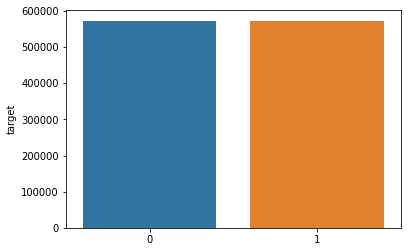

In [97]:
sns.barplot(x=['0','1'],y=y_over.value_counts()) 

In [30]:
model = XGBClassifier()

#treinando o modelo com as nova amostra oversample

model_2= model.fit(X_over,y_over)

#prevendo  o modelo com as nova amostra oversample

y_pred_2 = model_2.predict(X_test)

In [31]:
print('F1_Score: ',round(f1_score(y_test, y_pred_2)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_2)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_2)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_2)*100,2),'%')

F1_Score:  15.23 %
Recall:  70.13 %
Precision: 8.54 %
Accuracy  71.21 %


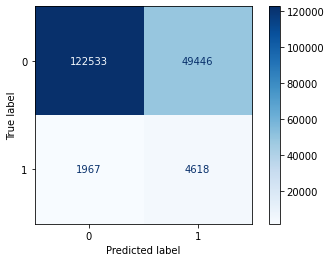

In [32]:
plot_confusion_matrix(model.fit(X_over,y_over),X_test,y_test,cmap='Blues')

## (SMOTE)

Synthetic Minority OverSampling Technique ou Técnica de Oversampling Sintética da
Minoria (em uma tradução livre), consiste em sintetizar elementos da classe
minoritária baseado nos elementos que já existem. Funciona de forma randômica
selecionando aleatoriamente observações da classe minoritária e computando pontos
através de um KNN. Os pontos sintéticos são adicionados entre os pontos escolhidos e
seus vizinhos.


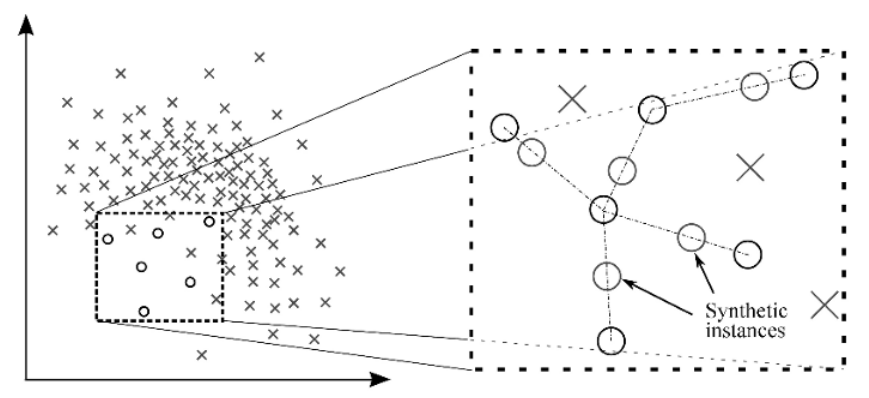

In [34]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_sample(X,y)

<AxesSubplot:ylabel='target'>

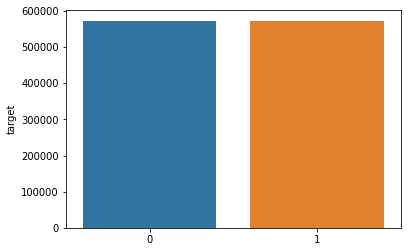

In [98]:
sns.barplot(x=['0','1'],y=y_sm.value_counts()) 

In [36]:
model = XGBClassifier()

#treinando o modelo com as nova amostra oversample

model_3= model.fit(X_sm,y_sm)

#prevendo  o modelo com as nova amostra oversample

y_pred_3 = model_3.predict(X_test)

In [37]:
print('F1_Score: ',round(f1_score(y_test, y_pred_3)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_3)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_3)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_3)*100,2),'%')

F1_Score:  0.64 %
Recall:  0.32 %
Precision: 87.5 %
Accuracy  96.32 %


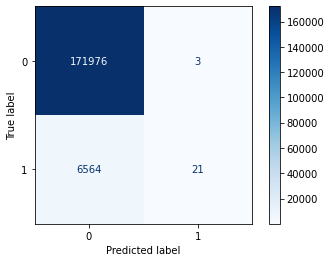

In [38]:
plot_confusion_matrix(model.fit(X_sm,y_sm),X_test,y_test,cmap='Blues')

## (ADASYN)

ADASYN (Adaptive Synthetic) também é um algoritmo que gera dados sintéticos. Sua
maior vantagem é que ele tenta aprender prioritariamente com os dados mais “difíceis
de aprender” da classe minoritária. Sua principal vantagem pode virar uma fraqueza
caso os dados da classe minoritária sejam muito esparsos.
Vamos à sua implementação:

Tamanho atual Counter({0: 573518, 1: 21694})


<AxesSubplot:ylabel='target'>

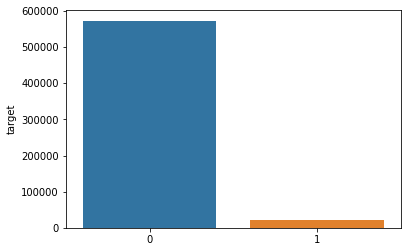

In [93]:
print("Tamanho atual",Counter(y))
sns.barplot(x=['0','1'],y=y.value_counts())

In [60]:
adasyn = ADASYN(random_state=42)

X_ada, y_ada = adasyn.fit_resample(X,y)

<AxesSubplot:ylabel='target'>

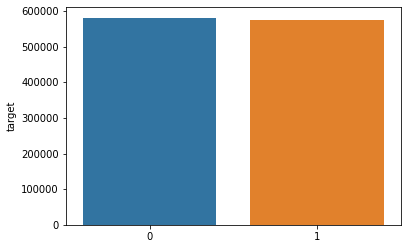

In [99]:
sns.barplot(x=['0','1'],y=y_ada.value_counts()) 

In [100]:
model = XGBClassifier()
model_4 = model.fit(X_ada,y_ada)
y_pred_4 = model_4.predict(X_test)

In [101]:
print('F1_Score: ',round(f1_score(y_test, y_pred_4)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_4)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_4)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_4)*100,2),'%')

F1_Score:  0.54 %
Recall:  0.27 %
Precision: 81.82 %
Accuracy  96.32 %


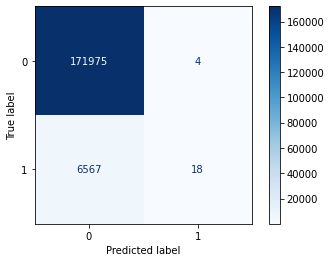

In [103]:
plot_confusion_matrix(model.fit(X_ada,y_ada),X_test,y_test,cmap='Blues')

In [203]:
print('------------------Normal------------------')
print('F1_Score: ',round(f1_score(y_test, y_pred)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred)*100,2),'%')

print('------------------Undersampling------------------')
print('F1_Score: ',round(f1_score(y_test, y_pred_1)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_1)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_1)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_1)*100,2),'%')

print('------------------Oversampling------------------')
print('F1_Score: ',round(f1_score(y_test, y_pred_2)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_2)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_2)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_2)*100,2),'%')

print('------------------SMOTE------------------')
print('F1_Score: ',round(f1_score(y_test, y_pred_3)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_3)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_3)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_3)*100,2),'%')

print('------------------ADASYN------------------')
print('F1_Score: ',round(f1_score(y_test, y_pred_4)*100,2),'%')
print('Recall: '  , round(recall_score(y_test, y_pred_4)*100,2),'%')
print('Precision:',round(precision_score(y_test, y_pred_4)*100,2),'%')
print('Accuracy ',round(accuracy_score(y_test, y_pred_4)*100,2),'%')



------------------Normal------------------
F1_Score:  0.12 %
Recall:  0.06 %
Precision: 19.05 %
Accuracy  96.3 %
------------------Undersampling------------------
F1_Score:  12.45 %
Recall:  74.9 %
Precision: 6.79 %
Accuracy  61.15 %
------------------Oversampling------------------
F1_Score:  15.23 %
Recall:  70.13 %
Precision: 8.54 %
Accuracy  71.21 %
------------------SMOTE------------------
F1_Score:  0.64 %
Recall:  0.32 %
Precision: 87.5 %
Accuracy  96.32 %
------------------ADASYN------------------
F1_Score:  0.54 %
Recall:  0.27 %
Precision: 81.82 %
Accuracy  96.32 %


Text(0.5, 1.0, 'ADASYN')

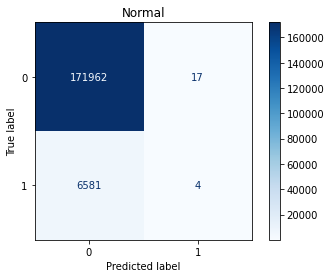

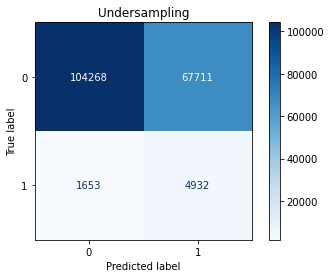

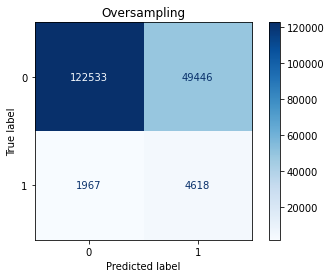

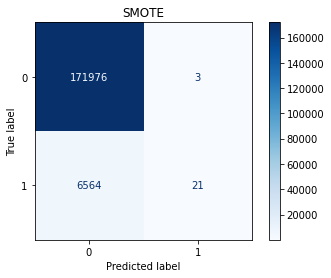

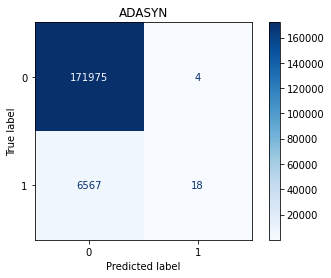

In [193]:
plot_confusion_matrix(XGBoost,X_test,y_test,cmap='Blues').ax_.set_title("Normal")
plot_confusion_matrix(model.fit(X_under,y_under),X_test,y_test,cmap='Blues',values_format = '').ax_.set_title("Undersampling")
plot_confusion_matrix(model.fit(X_over,y_over),X_test,y_test,cmap='Blues').ax_.set_title("Oversampling")
plot_confusion_matrix(model.fit(X_sm,y_sm),X_test,y_test,cmap='Blues').ax_.set_title("SMOTE")
plot_confusion_matrix(model.fit(X_ada,y_ada),X_test,y_test,cmap='Blues').ax_.set_title("ADASYN")


Text(0.5, 1.0, 'Undersampling')

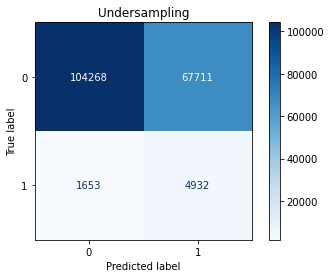

In [192]:
plot_confusion_matrix(model.fit(X_under,y_under),X_test,y_test,cmap='Blues',values_format = '').ax_.set_title("Undersampling")

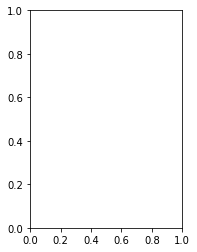

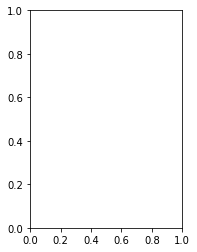

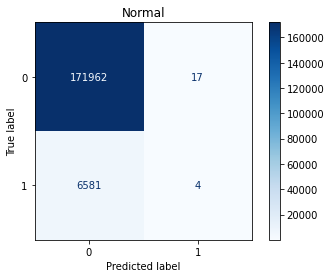

In [202]:
plt.subplot(1, 2, 1)

plot_confusion_matrix(model.fit(X_under,y_under),X_test,y_test,cmap='Blues',values_format = '').ax_.set_title("Undersampling")

plt.subplot(1, 2, 2)

plot_confusion_matrix(XGBoost,X_test,y_test,cmap='Blues').ax_.set_title("Normal")

plt.show()